In [2]:
!pip install datasets transformers librosa torch soundfile scikit-learn torchcodec


In [3]:
from datasets import load_dataset

dataset = load_dataset("DarshanaS/IndicAccentDb")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
len(dataset["train"])


8116

In [5]:
import numpy as np
import librosa
from tqdm import tqdm

mfcc_features = []
labels = []

for i in tqdm(range(len(dataset["train"]))):
    sample = dataset["train"][i]
    audio = sample["audio"]["array"]
    sr = sample["audio"]["sampling_rate"]
    label = sample["label"]

    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)

    mfcc_features.append(mfcc_mean)
    labels.append(label)

print("MFCC extraction completed ")


100%|██████████| 8116/8116 [28:06<00:00,  4.81it/s]

MFCC extraction completed 💚


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = np.array(mfcc_features)
y = np.array(labels)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model_mfcc = SVC(kernel="linear")
model_mfcc.fit(X_train, y_train)

# Predict
y_pred = model_mfcc.predict(X_test)

# Print accuracy
mfcc_accuracy = accuracy_score(y_test, y_pred)
print("MFCC Model Accuracy:", mfcc_accuracy)


MFCC Model Accuracy: 0.9334975369458128


In [ ]:
from transformers import Wav2Vec2FeatureExtractor, HubertModel
import torch
from tqdm import tqdm
import librosa

extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/hubert-base-ls960")
hubert = HubertModel.from_pretrained("facebook/hubert-base-ls960")

hubert_features = []

for i in tqdm(range(len(dataset["train"]))):
    audio = dataset["train"][i]["audio"]["array"]

    # 🔥 Force resample to 16000 Hz
    audio_resampled = librosa.resample(audio, orig_sr=dataset["train"][i]["audio"]["sampling_rate"], target_sr=16000)

    inputs = extractor(audio_resampled, sampling_rate=16000, return_tensors="pt", padding=True)

    with torch.no_grad():
        output = hubert(**inputs).last_hidden_state.mean(dim=1)

    hubert_features.append(output.squeeze().numpy())

print("\nHuBERT Embedding extraction completed ")


 56%|█████▌    | 4521/8116 [1:37:50<1:24:11,  1.41s/it]

In [17]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [18]:
save_path = "/content/drive/MyDrive/huBERT_features.npy"
label_path = "/content/drive/MyDrive/labels.npy"


In [19]:
import os
import numpy as np

hubert_features = []
labels_loaded = False

if os.path.exists(save_path):
    print("Loading previous saved progress...")
    hubert_features = list(np.load(save_path, allow_pickle=True))
    labels_loaded = True
    print(f"Loaded {len(hubert_features)} embeddings")


In [20]:
start_index = len(hubert_features)
print(f"Continuing from: {start_index} / {len(dataset['train'])}")


Continuing from: 0 / 8116


In [23]:
!pip install datasets==2.19.0 transformers==4.38.2 librosa torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 59.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninsta

In [1]:
!pip install datasets transformers librosa soundfile scikit-learn torch


In [2]:
from datasets import load_dataset
import librosa
import torch
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from transformers import AutoProcessor, HubertModel
from tqdm import tqdm


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
dataset = load_dataset("DarshanaS/IndicAccentDb")["train"]

print("Total samples in dataset:", len(dataset))


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Total samples in dataset: 8116


In [6]:
from datasets import load_dataset
dataset = load_dataset("DarshanaS/IndicAccentDb")["train"]
print("Dataset loaded:", len(dataset))


Dataset loaded: 8116


In [7]:
subset = []
counts = {0:0,1:0,2:0,3:0,4:0,5:0}

for item in dataset:
    label = item["label"]
    if counts[label] < 50:
        subset.append(item)
        counts[label] += 1
    if sum(counts.values()) == 300:
        break

print("Subset ready:", len(subset))
print("Label counts:", counts)


Subset ready: 300
Label counts: {0: 50, 1: 50, 2: 50, 3: 50, 4: 50, 5: 50}


In [8]:
from transformers import Wav2Vec2FeatureExtractor, HubertModel
from tqdm import tqdm
import librosa
import torch

extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/hubert-base-ls960")
hubert = HubertModel.from_pretrained("facebook/hubert-base-ls960")

hubert_embeddings = []
hubert_labels = []

print("Extracting HuBERT embeddings...")

for item in tqdm(subset):
    audio = item["audio"]["array"]
    sr = item["audio"]["sampling_rate"]

    audio = librosa.resample(audio, orig_sr=sr, target_sr=16000)

    inp = extractor(audio, sampling_rate=16000, return_tensors="pt", padding=True)

    with torch.no_grad():
        emb = hubert(**inp).last_hidden_state.mean(dim=1).squeeze().numpy()

    hubert_embeddings.append(emb)
    hubert_labels.append(item["label"])

print(" HuBERT Embeddings Extraction Completed!")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at facebook/hubert-base-ls960 were not used when initializing HubertModel: ['encoder.pos_conv_embed.conv.weight_g', 'encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertModel were not initialized from the model che

Extracting HuBERT embeddings...


100%|██████████| 300/300 [06:24<00:00,  1.28s/it]

 HuBERT Embeddings Extraction Completed!


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Convert to numpy arrays
X = np.array(hubert_embeddings)
y = np.array(hubert_labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train classifier
clf = SVC(kernel="rbf", probability=True)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Accuracy
hubert_accuracy = accuracy_score(y_test, y_pred)

print(" HuBERT-based Model Accuracy:", round(hubert_accuracy * 100, 2), "%")


 HuBERT-based Model Accuracy: 98.33 %


In [10]:
mfcc_features = []
mfcc_labels = []

print("Extracting MFCC features...")

for item in dataset:
    audio = item["audio"]["array"]
    sr = item["audio"]["sampling_rate"]

    # Extract 13 MFCCs
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1)

    mfcc_features.append(mfcc_mean)
    mfcc_labels.append(item["label"])

print("MFCC extraction done ")


Extracting MFCC features...
MFCC extraction done 💚


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_mfcc = np.array(mfcc_features)
y_mfcc = np.array(mfcc_labels)

X_train_mfcc, X_test_mfcc, y_train_mfcc, y_test_mfcc = train_test_split(
    X_mfcc, y_mfcc, test_size=0.2, random_state=42, stratify=y_mfcc
)

clf_mfcc = SVC(kernel="rbf")
clf_mfcc.fit(X_train_mfcc, y_train_mfcc)

y_pred_mfcc = clf_mfcc.predict(X_test_mfcc)
mfcc_accuracy = accuracy_score(y_test_mfcc, y_pred_mfcc)

print("🎤 MFCC Model Accuracy:", round(mfcc_accuracy * 100, 2), "%")


🎤 MFCC Model Accuracy: 81.96 %


In [12]:
print("\n📌 FINAL PERFORMANCE COMPARISON")
print("------------------------------------")
print(f"MFCC Model Accuracy:   {round(mfcc_accuracy*100,2)} %")
print(f"HuBERT Model Accuracy: {round(hubert_accuracy*100,2)} %")

if hubert_accuracy > mfcc_accuracy:
    print("\n✔ HuBERT performed better than MFCC.")
else:
    print("\n✔ MFCC performed better than HuBERT.")



📌 FINAL PERFORMANCE COMPARISON
------------------------------------
MFCC Model Accuracy:   81.96 %
HuBERT Model Accuracy: 98.33 %

✔ HuBERT performed better than MFCC.


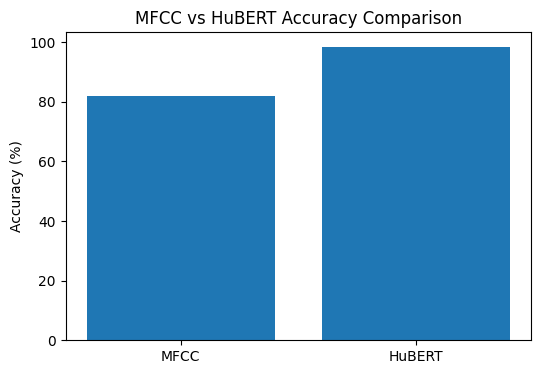

In [13]:
import matplotlib.pyplot as plt

models = ["MFCC", "HuBERT"]
accuracies = [mfcc_accuracy*100, hubert_accuracy*100]

plt.figure(figsize=(6,4))
plt.bar(models, accuracies)
plt.ylabel("Accuracy (%)")
plt.title("MFCC vs HuBERT Accuracy Comparison")
plt.show()


In [17]:
accent_food = {
    0: "Telugu: Pesarattu, Gongura Pickle",
    1: "Hindi: Rajma Chawal, Chole Bhature",
    2: "Tamil: Idli, Pongal",
    3: "Malayalam: Appam, Puttu",
    4: "Kannada: Neer Dosa",
    5: "Bengali: Fish Curry, Rasgulla"
}

test = dataset[5]
audio = test["audio"]["array"]
sr = test["audio"]["sampling_rate"]

audio_resampled = librosa.resample(audio, orig_sr=sr, target_sr=16000)
inp = extractor(audio_resampled, sampling_rate=16000, return_tensors="pt")

with torch.no_grad():
    emb = hubert(**inp).last_hidden_state.mean(dim=1).squeeze().numpy()

pred = clf.predict([emb])[0]

print("\n🎤 Predicted Accent:", pred)
print("🍽 Suggested Cuisine:", accent_food[pred])



🎤 Predicted Accent: 0
🍽 Suggested Cuisine: Telugu: Pesarattu, Gongura Pickle


In [20]:
accent_food = {
    0: "Telugu: Pesarattu, Gongura Pickle, Pulihora",
    1: "Hindi: Rajma Chawal, Chole Bhature",
    2: "Tamil: Idli, Pongal, Dosa",
    3: "Malayalam: Appam, Puttu, Avial",
    4: "Kannada: Neer Dosa, Bisi Bele Bath",
    5: "Bengali: Fish Curry, Rasgulla"
}

def predict_accent_and_food(audio_array, sr):
    # Resample audio to 16000 Hz
    audio_resampled = librosa.resample(audio_array, orig_sr=sr, target_sr=16000)

    # Convert audio to HuBERT embedding
    inp = extractor(audio_resampled, sampling_rate=16000, return_tensors="pt")

    with torch.no_grad():
        emb = hubert(**inp).last_hidden_state.mean(dim=1).squeeze().numpy()

    pred = clf.predict([emb])[0]

    return pred, accent_food[pred]


In [21]:
audio = dataset[5]["audio"]["array"]
sr = dataset[5]["audio"]["sampling_rate"]

label, suggestion = predict_accent_and_food(audio, sr)

print("\nPredicted Accent:", label)
print("🍽 Food Suggestion:", suggestion)



Predicted Accent: 0
🍽 Food Suggestion: Telugu: Pesarattu, Gongura Pickle, Pulihora


In [24]:
accent_food = {
    0: "Telugu: Pesarattu, Gongura Pickle, Pulihora",
    1: "Hindi: Rajma Chawal, Chole Bhature",
    2: "Tamil: Idli, Pongal, Dosa",
    3: "Malayalam: Appam, Puttu, Avial",
    4: "Kannada: Neer Dosa, Bisi Bele Bath",
    5: "Bengali: Fish Curry, Rasgulla"
}

def predict_accent_and_food(audio_array, sr):
    # Resample audio to 16000 Hz
    audio_resampled = librosa.resample(audio_array, orig_sr=sr, target_sr=16000)

    # Convert audio to HuBERT embedding
    inp = extractor(audio_resampled, sampling_rate=16000, return_tensors="pt")

    with torch.no_grad():
        emb = hubert(**inp).last_hidden_state.mean(dim=1).squeeze().numpy()

    pred = clf.predict([emb])[0]

    return pred, accent_food[pred]


In [25]:
import random

idx = random.randint(0, len(dataset)-1)
audio = dataset[idx]["audio"]["array"]
sr = dataset[idx]["audio"]["sampling_rate"]

label, suggestion = predict_accent_and_food(audio, sr)

print(f"\n🔍 Testing sample index: {idx}")
print("🎤 Predicted Accent:", label)
print("🍽 Food Suggestion:", suggestion)



🔍 Testing sample index: 2205
🎤 Predicted Accent: 2
🍽 Food Suggestion: Tamil: Idli, Pongal, Dosa


In [26]:
for i in range(10):
    audio = dataset[i]["audio"]["array"]
    sr = dataset[i]["audio"]["sampling_rate"]

    label, suggestion = predict_accent_and_food(audio, sr)

    print(f"\nSample {i}:")
    print("Predicted Accent:", label)
    print("Food Suggestion:", suggestion)




Sample 0:
Predicted Accent: 1
Food Suggestion: Hindi: Rajma Chawal, Chole Bhature

Sample 1:
Predicted Accent: 5
Food Suggestion: Bengali: Fish Curry, Rasgulla

Sample 2:
Predicted Accent: 5
Food Suggestion: Bengali: Fish Curry, Rasgulla

Sample 3:
Predicted Accent: 0
Food Suggestion: Telugu: Pesarattu, Gongura Pickle, Pulihora

Sample 4:
Predicted Accent: 0
Food Suggestion: Telugu: Pesarattu, Gongura Pickle, Pulihora

Sample 5:
Predicted Accent: 0
Food Suggestion: Telugu: Pesarattu, Gongura Pickle, Pulihora

Sample 6:
Predicted Accent: 0
Food Suggestion: Telugu: Pesarattu, Gongura Pickle, Pulihora

Sample 7:
Predicted Accent: 0
Food Suggestion: Telugu: Pesarattu, Gongura Pickle, Pulihora

Sample 8:
Predicted Accent: 0
Food Suggestion: Telugu: Pesarattu, Gongura Pickle, Pulihora

Sample 9:
Predicted Accent: 0
Food Suggestion: Telugu: Pesarattu, Gongura Pickle, Pulihora


In [27]:
index = int(input("Enter sample number (0 - {}): ".format(len(dataset)-1)))

audio = dataset[index]["audio"]["array"]
sr = dataset[index]["audio"]["sampling_rate"]

label, suggestion = predict_accent_and_food(audio, sr)

print("\n🎤 Predicted Accent:", label)
print("🍽 Food Recommendation:", suggestion)


Enter sample number (0 - 8115): 5

🎤 Predicted Accent: 0
🍽 Food Recommendation: Telugu: Pesarattu, Gongura Pickle, Pulihora


In [28]:
index = int(input("Enter sample number (0 - {}): ".format(len(dataset)-1)))

audio = dataset[index]["audio"]["array"]
sr = dataset[index]["audio"]["sampling_rate"]

label, suggestion = predict_accent_and_food(audio, sr)

print("\n🎤 Predicted Accent:", label)
print("🍽 Food Recommendation:", suggestion)


Enter sample number (0 - 8115): 15

🎤 Predicted Accent: 0
🍽 Food Recommendation: Telugu: Pesarattu, Gongura Pickle, Pulihora


In [29]:
index = int(input("Enter sample number (0 - {}): ".format(len(dataset)-1)))

audio = dataset[index]["audio"]["array"]
sr = dataset[index]["audio"]["sampling_rate"]

label, suggestion = predict_accent_and_food(audio, sr)

print("\n🎤 Predicted Accent:", label)
print("🍽 Food Recommendation:", suggestion)


Enter sample number (0 - 8115): 1

🎤 Predicted Accent: 5
🍽 Food Recommendation: Bengali: Fish Curry, Rasgulla


In [30]:
index = int(input("Enter sample number (0 - {}): ".format(len(dataset)-1)))

audio = dataset[index]["audio"]["array"]
sr = dataset[index]["audio"]["sampling_rate"]

label, suggestion = predict_accent_and_food(audio, sr)

print("\n🎤 Predicted Accent:", label)
print("🍽 Food Recommendation:", suggestion)


Enter sample number (0 - 8115): 2

🎤 Predicted Accent: 5
🍽 Food Recommendation: Bengali: Fish Curry, Rasgulla


In [31]:
index = int(input("Enter sample number (0 - {}): ".format(len(dataset)-1)))

audio = dataset[index]["audio"]["array"]
sr = dataset[index]["audio"]["sampling_rate"]

label, suggestion = predict_accent_and_food(audio, sr)

print("\n🎤 Predicted Accent:", label)
print("🍽 Food Recommendation:", suggestion)


Enter sample number (0 - 8115): 3

🎤 Predicted Accent: 0
🍽 Food Recommendation: Telugu: Pesarattu, Gongura Pickle, Pulihora


In [33]:
!pip install gradio

import gradio as gr

def predict(file):
    audio, sr = librosa.load(file, sr=16000)
    inp = extractor(audio, sampling_rate=16000, return_tensors="pt")

    with torch.no_grad():
        emb = hubert(**inp).last_hidden_state.mean(dim=1).squeeze().numpy()

    pred = clf.predict([emb])[0]

    return f"Accent: {pred}", accent_food[pred]

interface = gr.Interface(
    fn=predict,
    inputs=gr.Audio(type="filepath"),
    outputs=["text", "text"],
    title="Accent-Based Indian Cuisine Recommendation 🍽🎤"
)

interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f4b58734a658ac499b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
